In [1]:
# coding:utf-8

import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image
import glob

Using TensorFlow backend.


In [2]:
folder = []
files = glob.glob("./pre-all/train-seeds/**", recursive=True)
del files[0]
end_list = ['.png', '.jpg', '.jpeg']
for i, f in enumerate(files):
    flag = 0
    for e in end_list:
        if e in f:
            flag = 1
            break
            
    if flag == 0:
        dir_name = f.split('/')[-1]
        print('dir_name : ' + dir_name)
        folder.append(dir_name)
    
folder

dir_name : 95
dir_name : 50
dir_name : hanging_dry
dir_name : not_bleachable
dir_name : wetcleaning_weak
dir_name : 60
dir_name : wetcleaning_ok
dir_name : donot_drycleaning
dir_name : weetcleaning_very_weak
dir_name : 30_very_weak
dir_name : 40_very_weak
dir_name : ironing_upto200
dir_name : not_washable
dir_name : donot_wetcleaning
dir_name : drycleaning_F
dir_name : bleachable
dir_name : flat_dry_shade
dir_name : drycleaning_F_weak
dir_name : flat_dry_wet
dir_name : drycleaning_P_weak
dir_name : tumble_dry_upto60
dir_name : ironing_upto150
dir_name : donot_tumble_dry
dir_name : 30
dir_name : hanging_dry_wet
dir_name : flat_dry_wetshade
dir_name : 40_weak
dir_name : donot_ironing
dir_name : flat_dry
dir_name : 60_weak
dir_name : hanging_dry_shade
dir_name : bleachable_oxygen
dir_name : 30_weak
dir_name : drycleaning_P
dir_name : hand-wash
dir_name : 70
dir_name : hanging_dry_wetshade
dir_name : tumble_dry_upto80
dir_name : 40
dir_name : 50_weak
dir_name : ironing_upto110


['95',
 '50',
 'hanging_dry',
 'not_bleachable',
 'wetcleaning_weak',
 '60',
 'wetcleaning_ok',
 'donot_drycleaning',
 'weetcleaning_very_weak',
 '30_very_weak',
 '40_very_weak',
 'ironing_upto200',
 'not_washable',
 'donot_wetcleaning',
 'drycleaning_F',
 'bleachable',
 'flat_dry_shade',
 'drycleaning_F_weak',
 'flat_dry_wet',
 'drycleaning_P_weak',
 'tumble_dry_upto60',
 'ironing_upto150',
 'donot_tumble_dry',
 '30',
 'hanging_dry_wet',
 'flat_dry_wetshade',
 '40_weak',
 'donot_ironing',
 'flat_dry',
 '60_weak',
 'hanging_dry_shade',
 'bleachable_oxygen',
 '30_weak',
 'drycleaning_P',
 'hand-wash',
 '70',
 'hanging_dry_wetshade',
 'tumble_dry_upto80',
 '40',
 '50_weak',
 'ironing_upto110']

In [3]:
#folder = ["40_weak","donot_tumble_dry","ironing_upto150","not_bleachable"]
image_size = 50

X = []
Y = []
for index, name in enumerate(folder):
    dir = "./pre-all/train/" + name
    files = glob.glob(dir + "/*.png")
    for i, file in enumerate(files):
        image = Image.open(file)
        image = image.convert("RGB")
        image = image.resize((image_size, image_size))
        data = np.asarray(image)
        X.append(data)
        Y.append(index)

X = np.array(X)
Y = np.array(Y)

In [4]:
X = X.astype('float32')
X = X / 255.0
X.shape

(13334, 50, 50, 3)

In [5]:
# 正解ラベルの形式を変換
Y = np_utils.to_categorical(Y, len(folder))

In [6]:
# 学習用データとテストデータ
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [9]:
# CNNを構築
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# model.add(Conv2D(64, (3, 3), padding='same'))
# model.add(Activation('relu'))
# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(len(folder)))
model.add(Activation('softmax'))

# コンパイル
model.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])

In [11]:
#訓練
history = model.fit(X_train, y_train, epochs=1, validation_data=(X_test, y_test))

Train on 10667 samples, validate on 2667 samples
Epoch 1/1
10667/10667 [==============================] - 1763s 165ms/step - loss: 2.7226 - acc: 0.2870 - val_loss: 0.8300 - val_acc: 0.8196


In [12]:
#評価 & 評価結果出力
print(model.evaluate(X_test, y_test))


2667/2667 [==============================] - 116s 44ms/step
[0.8299775698634628, 0.8196475441687376]


In [13]:
# モデルの保存
open('and_small.json',"w").write(model.to_json())

# 学習済みの重みを保存
model.save_weights('and_small_weight.hdf5')

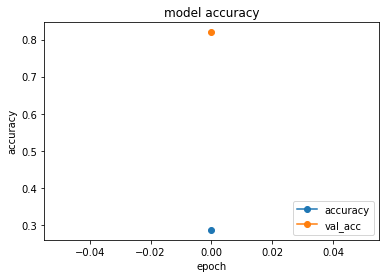

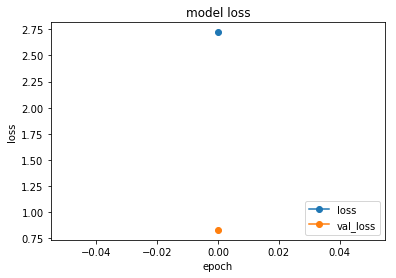

In [14]:
import matplotlib.pyplot as plt

%matplotlib inline

def plot_history(history):
    # 精度の履歴をプロット
    plt.plot(history.history['acc'],"o-",label="accuracy")
    plt.plot(history.history['val_acc'],"o-",label="val_acc")
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(loc="lower right")
    plt.show()

    # 損失の履歴をプロット
    plt.plot(history.history['loss'],"o-",label="loss",)
    plt.plot(history.history['val_loss'],"o-",label="val_loss")
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='lower right')
    plt.show()

plot_history(history)